Total number of entries: 3835
Average number of answers per question: 3.169491525423729
Sample questions:
0                               what is parkinesonism?
1    I scream, shout and swear in my sleep. How do ...
2    what does m.c.h.c stand for in my hematology t...
3       whats the best way to clear pluged up sinuses?
4     Are their any good home remedies for tooth pain?
Name: question, dtype: object


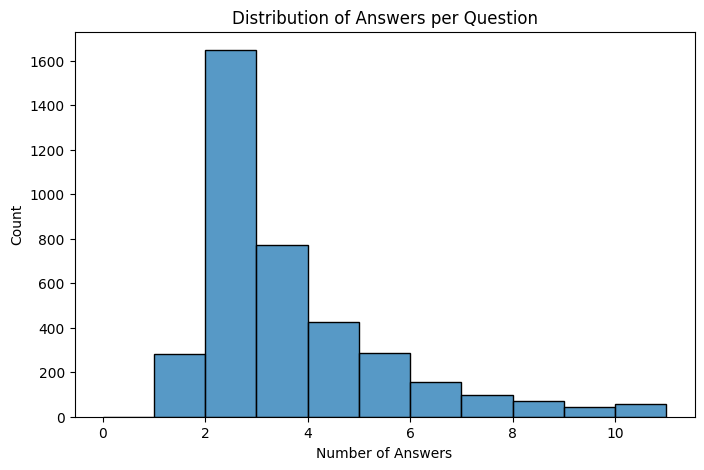

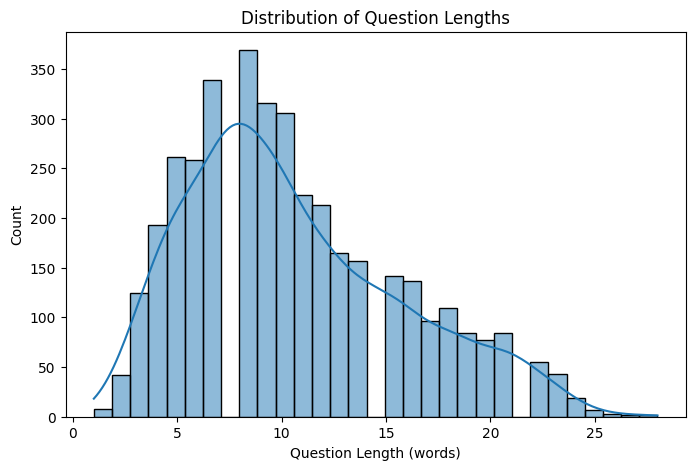

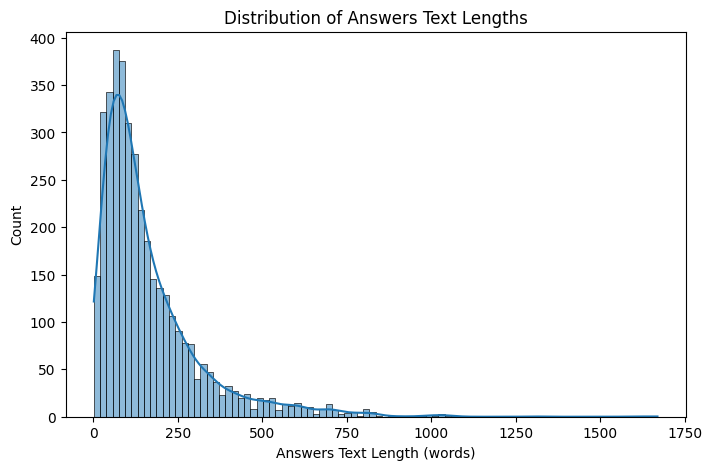

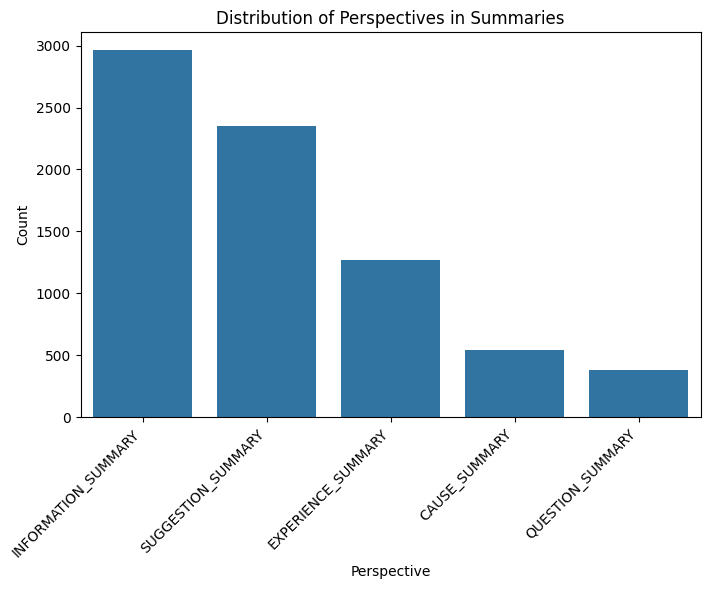




Question length statistics (words):
count    3835.000000
mean       10.562451
std         5.184992
min         1.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        28.000000
Name: question_length, dtype: float64
Answers length statistics (words):
count    3835.000000
mean      163.419296
std       154.523904
min         2.000000
25%        63.000000
50%       115.000000
75%       209.000000
max      1669.000000
Name: answers_length, dtype: float64



Sample entries with perspectives:
       uri                                           question  \
0  4367393                             what is parkinesonism?   
1  1504599  I scream, shout and swear in my sleep. How do ...   
2  1701378  what does m.c.h.c stand for in my hematology t...   
3    45070     whats the best way to clear pluged up sinuses?   
4  1752893   Are their any good home remedies for tooth pain?   
5  4458602        How long will it take HIV symptoms to show?   
6  1627381      What is

In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# function to load data from JSON file
def load_data_from_json(filepath):
    with open(filepath, "r", encoding="utf-8") as file:
        return json.load(file)

# Set the paths as provided
train_path = "puma_dataset/train.json"
test_path  = "puma_dataset/test.json"
val_path   = "puma_dataset/valid.json"

# Load the datasets
train_data = load_data_from_json(train_path)
test_data  = load_data_from_json(test_path)
val_data   = load_data_from_json(val_path)

# Combine all data if needed for overall analysis
all_data = train_data + val_data + test_data

# Flatten the data into a DataFrame for easier analysis
def flatten_data(data):
    rows = []
    for entry in data:
        uri = entry.get("uri", "")
        question = entry.get("question", "")
        answers = entry.get("answers", [])
        num_answers = len(answers)
        answers_text = " ".join(answers)
        # Get available perspective labels from labelled_summaries
        labelled_summaries = entry.get("labelled_summaries", {})
        perspectives = list(labelled_summaries.keys())
        rows.append({
            "uri": uri,
            "question": question,
            "num_answers": num_answers,
            "answers_text": answers_text,
            "perspectives": perspectives
        })
    return pd.DataFrame(rows)

df = flatten_data(all_data)

# Basic statistics
print("Total number of entries:", len(df))
print("Average number of answers per question:", df["num_answers"].mean())
print("Sample questions:")
print(df["question"].head())

# Plot distribution of number of answers per question
plt.figure(figsize=(8, 5))
sns.histplot(df["num_answers"], bins=range(0, df["num_answers"].max() + 2), kde=False)
plt.xlabel("Number of Answers")
plt.ylabel("Count")
plt.title("Distribution of Answers per Question")
plt.savefig("answers_distribution.png")
plt.show()

# Calculate and plot the distribution of question lengths (in words)
df["question_length"] = df["question"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df["question_length"], kde=True)
plt.xlabel("Question Length (words)")
plt.title("Distribution of Question Lengths")
plt.savefig("question_length_distribution.png")
plt.show()

# Calculate and plot the distribution of answers text lengths (in words)
df["answers_length"] = df["answers_text"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df["answers_length"], kde=True)
plt.xlabel("Answers Text Length (words)")
plt.title("Distribution of Answers Text Lengths")
plt.savefig("answers_length_distribution.png")
plt.show()

# Analyze distribution of perspectives in labelled summaries
all_perspectives = []
for perspectives in df["perspectives"]:
    all_perspectives.extend(perspectives)
perspectives_series = pd.Series(all_perspectives)
perspective_counts = perspectives_series.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=perspective_counts.index, y=perspective_counts.values)
plt.xlabel("Perspective")
plt.ylabel("Count")
plt.title("Distribution of Perspectives in Summaries")

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

plt.savefig("perspective_distribution.png")
plt.show()

print("\n\n")
# Print descriptive statistics for question and answer lengths
print("Question length statistics (words):")
print(df["question_length"].describe())
print("Answers length statistics (words):")
print(df["answers_length"].describe())

print("\n\n")
# Display a few sample entries with their perspectives
print("Sample entries with perspectives:")
print(df[["uri", "question", "perspectives"]].head(10))
